# Quickstart to Selene

This tutorial uses the same data and setup as [`getting_started_with_selene.ipynb`](https://github.com/FunctionLab/selene/blob/master/tutorials/getting_started_with_selene/getting_started_with_selene.ipynb), but excludes all the background and data preparation work.
It shows the minimal amount of code needed to run Selene itself.

## Setup

**Architecture:** Just to show how we might run Selene using a slightly different model architecture with the same dataset, we use a file `./data/deeperdeepsea.py` that doubles the number of convolutional layers that DeepSEA has.
Note that the architecture file has the same format as [`deepsea.py`](https://github.com/FunctionLab/selene/blob/master/models/deepsea.py) (it contains the model architecture class, the method `criterion`, and the method `get_optimizer(lr)`).

**Data:** We downloaded the measurements for transcription factor CTCF in cell type GM12878 from ENCODE. More information about the data is in the "Getting Started" tutorial. For data sampling, we are going to use Selene's `IntervalsSampler`, which will create samples on-the-fly by randomly selecting positions from a specific set of regions (see note) and using the **1000bp** sequences centered at those positions as the inputs to the model. Further, to assign the targets associated with each 1000bp sequence, the sampler queries a tabix-indexed targets file for the genomic features that overlap with the middle **200bp** region of the sequence. **You can refer to [simple_train.yml](https://github.com/FunctionLab/selene/blob/master/tutorials/quickstart_training/simple_train.yml) to see how this is specified.**

_Note: The regions we use are regions from the DeepSEA dataset which contain at least 1 transcription factor._


## Download the data

Download the compressed data from here:

```sh
wget https://zenodo.org/record/1319886/files/selene_quickstart_tutorial.tar.gz
```

Extract it and `mv` all files from the extracted directory `selene_quickstart_tutorial` to the current directory.

In [4]:
%matplotlib inline

from selene_sdk.utils import load_path
from selene_sdk.utils import parse_configs_and_run

Note that these are also the only 2 lines of code in the Selene repository's command-line script [`selene_cli.py`](https://github.com/FunctionLab/selene/selene_cli.py).

Before running `load_path` on `simple_train.yml`, please edit the YAML file to include the absolute path of the model file (`./data/deeperdeepsea.py` is the relative path).

Currently, the model is set to train on GPU. If you do not have CUDA on your machine, please set `use_cuda` to `False` in the configuration file. (This will slow down the process considerably.)

In [5]:
configs = load_path("./simple_train.yml",
                    # TODO: this should be the default. It is always False in our case.
                    instantiate=False)

Outputs and logs saved to ./training_outputs
[VALIDATE] average roc_auc: 0.9565518624441965
[VALIDATE] average average_precision: 0.3832875930384928
[VALIDATE] average roc_auc: 0.9681843909438775
[VALIDATE] average average_precision: 0.4744168929045225
[VALIDATE] average roc_auc: 0.9730049226721939
[VALIDATE] average average_precision: 0.49195441551475033
[VALIDATE] average roc_auc: 0.9725173389668367
[VALIDATE] average average_precision: 0.47093426655782833
[VALIDATE] average roc_auc: 0.9755342693718111
[VALIDATE] average average_precision: 0.49982738231848506
[VALIDATE] average roc_auc: 0.9767118243781888
[VALIDATE] average average_precision: 0.4956403313228482
[VALIDATE] average roc_auc: 0.9750437460140305
[VALIDATE] average average_precision: 0.5048359127495593
[TEST] average roc_auc: 0.9747204130662728
[TEST] average average_precision: 0.4921388623318994


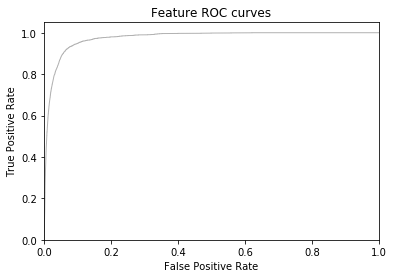

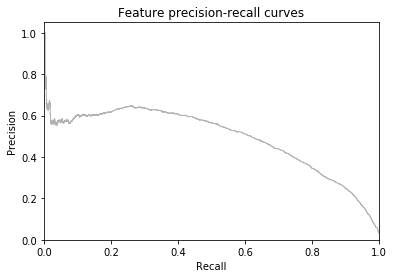

In [6]:
parse_configs_and_run(configs, lr=0.10)